In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [68]:
new_cust = pd.read_excel('/content/drive/MyDrive/DA/Customer Segmentation Analysis/Raw_data.xlsx' , sheet_name='NewCustomerList')
new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [69]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

1. Drop irrelevent columns

In [70]:
new_cust.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1 , inplace=True)

2. Missing value check

In [71]:
new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

2.1 last_name

In [72]:
new_cust['last_name'].fillna('None', inplace = True)

In [73]:
new_cust['last_name'].isnull().sum()

0

2.2 DOB (Date of Birth)

In [74]:
new_cust[new_cust['DOB'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaN,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaN,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaN,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaN,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaN,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaN,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaN,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaN,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaN,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaN,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [75]:
print(len(new_cust[new_cust['DOB'].isnull()]))

17


Less than 5 % of data has null date of birth, so remove the records where date of birth is null

In [76]:
dob_index_null = new_cust[new_cust['DOB'].isnull()].index
new_cust.drop(index=dob_index_null, inplace=True, axis=0)
new_cust['DOB'].isnull().sum()

0

Create new columns which calculate the age from the year transaction

In [77]:
new_cust['DOB'] = pd.to_datetime(new_cust['DOB'])

import datetime
def age(born):
    today = 2017
    return today - born.year

new_cust['Age'] = new_cust.apply(lambda x: age(x.DOB), axis = 1)

In [78]:
new_cust['Age'].describe()

count    983.000000
mean      46.206511
std       17.074268
min       15.000000
25%       34.000000
50%       45.000000
75%       60.000000
max       79.000000
Name: Age, dtype: float64

<ipython-input-79-4e30db354f80>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['Age'], kde=False, bins=50)


<Axes: xlabel='Age'>

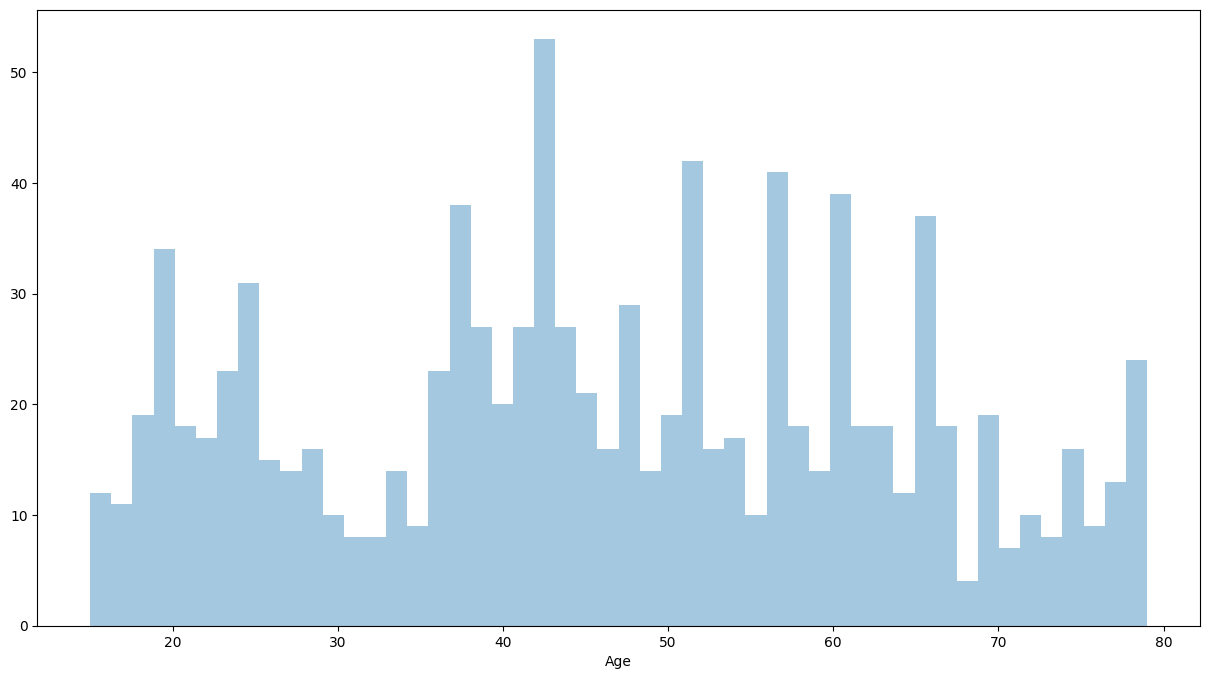

In [79]:
plt.figure(figsize=(15,8))
sns.distplot(new_cust['Age'], kde=False, bins=50)

Create Age group

In [80]:
new_cust['Group_Age'] = new_cust['Age'].apply(lambda x: (round(x/10) * 10))

<ipython-input-81-392050814073>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['Group_Age'], kde=False, bins=50)


<Axes: xlabel='Group_Age'>

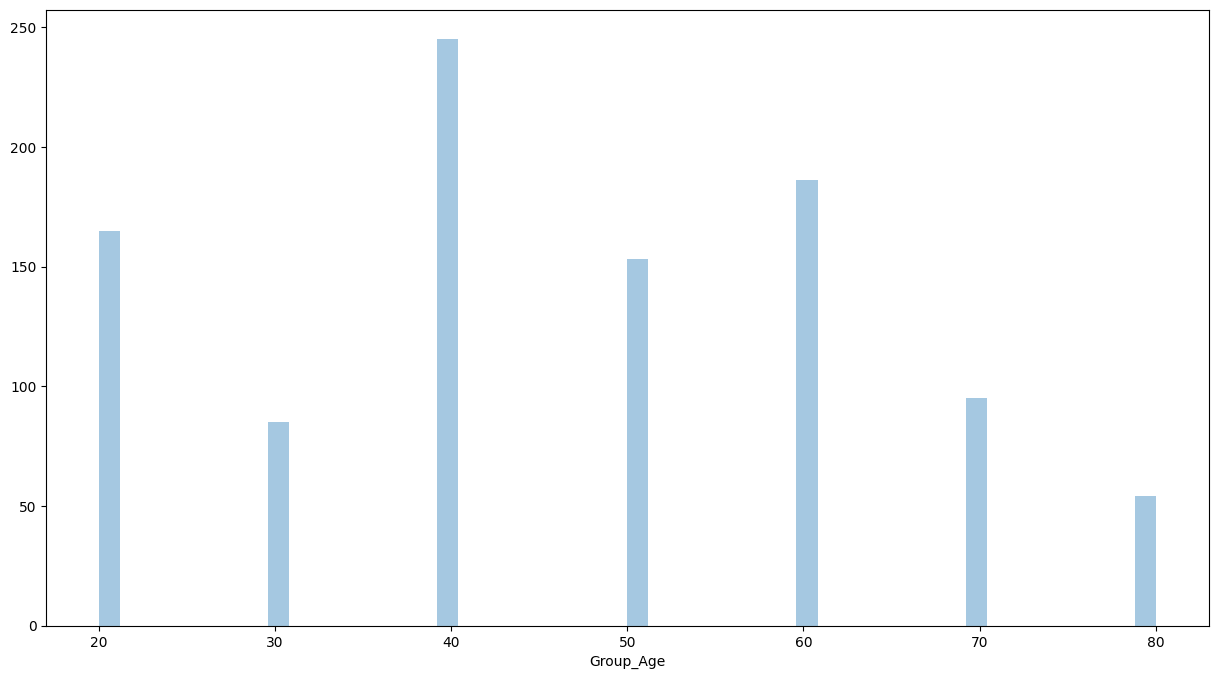

In [81]:
plt.figure(figsize=(15,8))
sns.distplot(new_cust['Group_Age'], kde=False, bins=50)

2.3 job_title

In [82]:
new_cust[new_cust['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Group_Age
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500,63,60
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750,72,70
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938,57,60
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938,37,40
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500,38,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,None,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,6,59252 Maryland Drive,3500,VIC,Australia,3,951,0.450500,40,40
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000,55,60
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,18,20
972,Ellwood,Budden,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,11,79907 Randy Center,2192,NSW,Australia,10,972,0.430000,19,20


In [83]:
print('The proportion of missing job title: ', round(len(new_cust[new_cust['job_title'].isnull()]) / len(new_cust) *100 ), "%")

The proportion of missing job title:  11 %


In [84]:
new_cust['job_title'].fillna('Missing', inplace = True)

In [85]:
new_cust['job_title'].isnull().sum()

0

3. job_industry_category

In [86]:
new_cust['job_industry_category'].value_counts()

job_industry_category
Financial Services    202
Manufacturing         199
Health                152
Retail                 78
Property               64
Entertainment          36
IT                     36
Argiculture            26
Telecommunications     25
Name: count, dtype: int64

In [87]:
new_cust['job_industry_category'].fillna('Missing', inplace = True)

In [88]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
Group_Age                              0
dtype: int64

Currently there are no missing values in dataset

3. Inconsistency Check in Data

In [89]:
df_numeric = new_cust.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :", numeric_cols)

df_non_numeric = new_cust.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :", non_numeric_cols)


The numeric columns are : ['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Rank' 'Value' 'Age' 'Group_Age']
The non-numeric columns are : ['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


In [90]:
new_cust['state'].value_counts()

state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

In [91]:
new_cust['owns_car'].value_counts()

owns_car
No     497
Yes    486
Name: count, dtype: int64

In [92]:
new_cust['wealth_segment'].value_counts()

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

In [93]:
new_cust['gender'].value_counts()

gender
Female    513
Male      470
Name: count, dtype: int64

In [94]:
new_cust['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

<ipython-input-95-542d9703921a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_cust['tenure'])


<Axes: xlabel='tenure', ylabel='Density'>

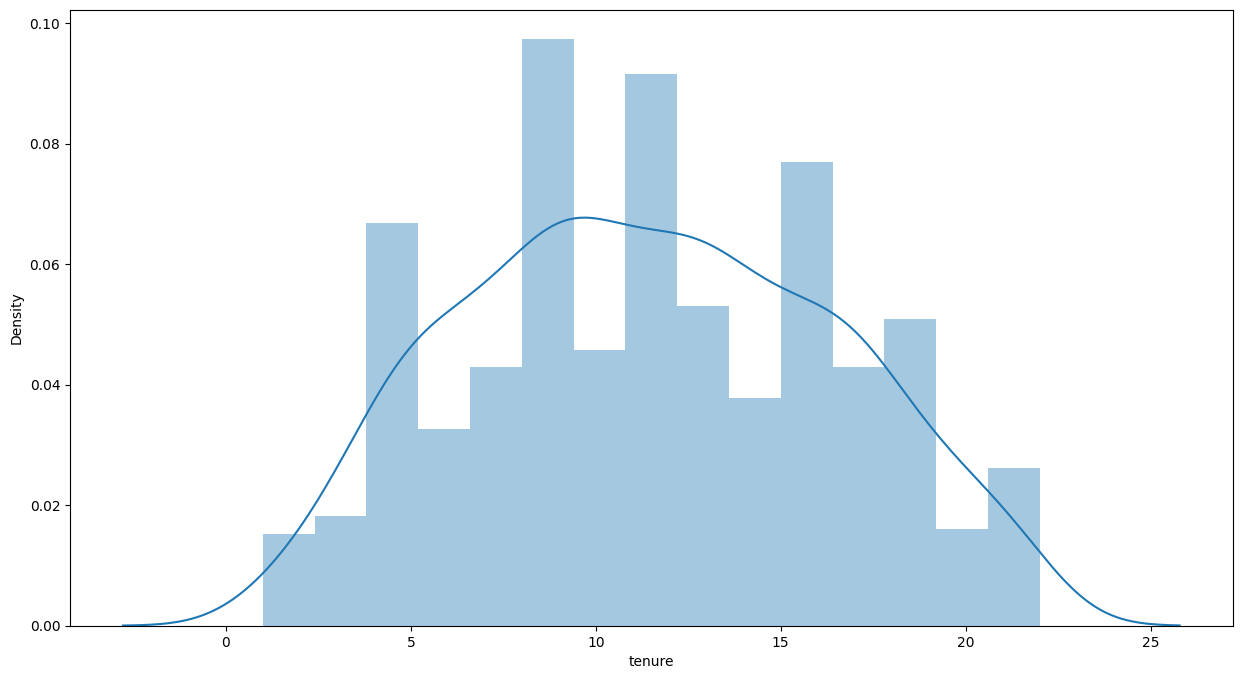

In [95]:
plt.figure(figsize=(15,8))
sns.distplot(new_cust['tenure'])

In [98]:
new_cust.drop_duplicates(inplace = True)

In [96]:
new_cust.shape

(983, 20)

In [100]:
new_cust.to_csv('/content/drive/MyDrive/DA/Customer Segmentation Analysis/NewCustomerCleaned.csv', index = False)